<a href="https://colab.research.google.com/github/rani0380/daejungAWS/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B01%ED%9A%8C_1%EA%B3%BC%EC%A0%9C%ED%92%80%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **경운대 빅데이터 분야 study**

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('hs1.csv',encoding='cp949')

In [3]:
df

,날짜,지점,평균기온(°C),최저기온(°C),최고기온(°C)
0,\t2010-01-01,108.0,-7.6,-12.7,-3.6
1,\t2010-01-02,108.0,-3.6,-7.4,0.2
2,\t2010-01-03,108.0,-6.8,-10.5,-3.2
3,\t2010-01-04,108.0,-5.9,-8.0,-3.4
4,\t2010-01-05,108.0,-9.9,-12.3,-7.0
...,...,...,...,...,...
5657,\t2025-06-28,108.0,26.2,24.5,28.1
5658,\t2025-06-29,108.0,27.1,24.9,30.2
5659,\t2025-06-30,108.0,28.2,25.6,31.2
5660,\t2025-07-01,108.0,28.6,26.2,31.8


In [4]:
# 날짜 열에서 탭 제거 + 문자열로 변환 후 datetime 형식으로 바꾸기
df['날짜'] = df['날짜'].astype(str).str.strip()
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y-%m-%d')

In [5]:
df

,날짜,지점,평균기온(°C),최저기온(°C),최고기온(°C)
0,2010-01-01,108.0,-7.6,-12.7,-3.6
1,2010-01-02,108.0,-3.6,-7.4,0.2
2,2010-01-03,108.0,-6.8,-10.5,-3.2
3,2010-01-04,108.0,-5.9,-8.0,-3.4
4,2010-01-05,108.0,-9.9,-12.3,-7.0
...,...,...,...,...,...
5657,2025-06-28,108.0,26.2,24.5,28.1
5658,2025-06-29,108.0,27.1,24.9,30.2
5659,2025-06-30,108.0,28.2,25.6,31.2
5660,2025-07-01,108.0,28.6,26.2,31.8


In [6]:
# 헤더 출력
print(list(df.columns))

# 그 다음 2행 출력 (for문 사용)
for i in range(2):
    print(list(map(str, df.iloc[i])))


['날짜', '지점', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)']
['2010-01-01 00:00:00', '108.0', '-7.6', '-12.7', '-3.6']
['2010-01-02 00:00:00', '108.0', '-3.6', '-7.4', '0.2']


In [7]:
# 사용자 입력
date_input = input("2010-10-10 와같이 날짜를 입력하시오. : ")

# 해당 날짜의 행 추출
row = df[df['날짜'] == date_input].iloc[0]

# 문자열로 변환 후 출력
print(list(map(str, row)))

2010-10-10 와같이 날짜를 입력하시오. : 2010-10-10
['2010-10-10 00:00:00', '108.0', '18.5', '14.3', '22.8']


In [8]:
# 날짜 컬럼을 datetime으로 변환 (필요한 경우)
df['날짜'] = pd.to_datetime(df['날짜'], errors='coerce')

# 문자열로 형식 맞춤: YYYY-MM-DD
df['날짜'] = df['날짜'].dt.strftime('%Y-%m-%d')

# 사용자 입력
date_input = input("2010-10-10 와같이 날짜를 입력하시오. : ")

# 해당 날짜의 행 추출
row = df[df['날짜'] == date_input].iloc[0]

# 문자열로 변환 후 출력
print(list(map(str, row)))


2010-10-10 와같이 날짜를 입력하시오. : 2010-10-10
['2010-10-10', '108.0', '18.5', '14.3', '22.8']


In [9]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

/tmp/ipython-input-11-1957437134.py:47: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


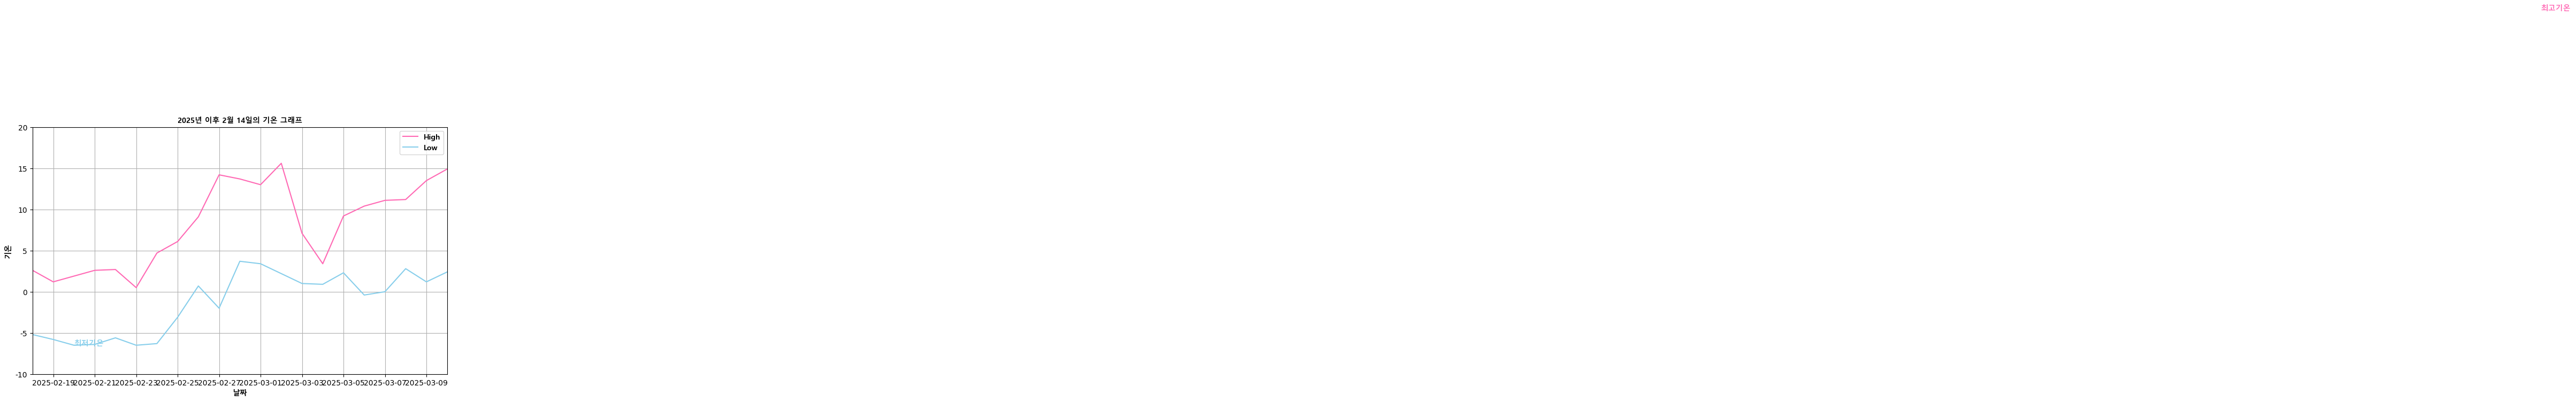

In [11]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

# ▶ 폰트 설정 (malgun.ttf 업로드 후)
font_path = '/content/malgunbd.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# ▶ 날짜 데이터 전처리
df['날짜'] = df['날짜'].astype(str).str.strip()
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y-%m-%d')

# ▶ 2025년 2월 14일 이후 데이터 필터링
df_filtered = df[df['날짜'] > '2025-02-14'].reset_index(drop=True)

# ▶ 기온 데이터
high = df_filtered['최고기온(°C)']
low = df_filtered['최저기온(°C)']
x = df_filtered['날짜']

# ▶ 그래프 출력
plt.figure(figsize=(10, 6))
plt.plot(x, high, color='hotpink', label='High')
plt.plot(x, low, color='skyblue', label='Low')

# ▶ 최고/최저기온 텍스트 표시
plt.text(x[high.idxmax()], high.max(), '최고기온', color='hotpink', fontproperties=font_prop)
plt.text(x[low.idxmin()], low.min(), '최저기온', color='skyblue', fontproperties=font_prop)

# ▶ 축 범위 설정
if len(x) > 23:
    plt.xlim(x.iloc[3], x.iloc[23])
else:
    plt.xlim(x.iloc[0], x.iloc[-1])
plt.ylim(-10, 20)

# ▶ 라벨 및 제목
plt.xlabel('날짜', fontproperties=font_prop)
plt.ylabel('기온', fontproperties=font_prop)
plt.title('2025년 이후 2월 14일의 기온 그래프', fontproperties=font_prop)

# ▶ 범례 및 그리드
plt.legend(prop=font_prop)
plt.grid(True)
plt.tight_layout()

plt.show()



In [23]:
# 나이별 남자 인구 컬럼 확인
age_columns = [col for col in df.columns if col.startswith('2020년01월_남_') and col.endswith('세')]
print("age_columns:", age_columns)
print("컬럼 수:", len(age_columns))


age_columns: ['2020년01월_남_0세', '2020년01월_남_1세', '2020년01월_남_2세', '2020년01월_남_3세', '2020년01월_남_4세', '2020년01월_남_5세', '2020년01월_남_6세', '2020년01월_남_7세', '2020년01월_남_8세', '2020년01월_남_9세', '2020년01월_남_10세', '2020년01월_남_11세', '2020년01월_남_12세', '2020년01월_남_13세', '2020년01월_남_14세', '2020년01월_남_15세', '2020년01월_남_16세', '2020년01월_남_17세', '2020년01월_남_18세', '2020년01월_남_19세', '2020년01월_남_20세', '2020년01월_남_21세', '2020년01월_남_22세', '2020년01월_남_23세', '2020년01월_남_24세', '2020년01월_남_25세', '2020년01월_남_26세', '2020년01월_남_27세', '2020년01월_남_28세', '2020년01월_남_29세', '2020년01월_남_30세', '2020년01월_남_31세', '2020년01월_남_32세', '2020년01월_남_33세', '2020년01월_남_34세', '2020년01월_남_35세', '2020년01월_남_36세', '2020년01월_남_37세', '2020년01월_남_38세', '2020년01월_남_39세', '2020년01월_남_40세', '2020년01월_남_41세', '2020년01월_남_42세', '2020년01월_남_43세', '2020년01월_남_44세', '2020년01월_남_45세', '2020년01월_남_46세', '2020년01월_남_47세', '2020년01월_남_48세', '2020년01월_남_49세', '2020년01월_남_50세', '2020년01월_남_51세', '2020년01월_남_52세', '2020년01월_남_53세', '2020년01월_남_54세', '2020년

/tmp/ipython-input-34-3985951186.py:30: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


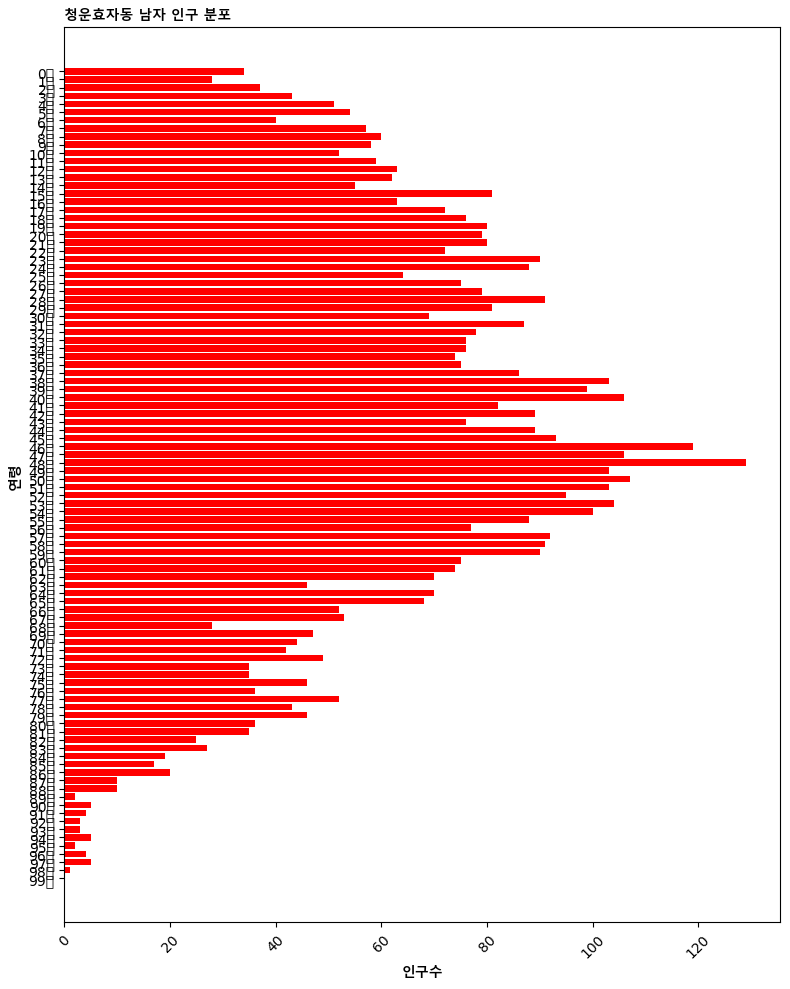

In [34]:
import matplotlib.font_manager as fm
import pandas as pd

# ▶ 폰트 설정 (malgun.ttf 업로드 후)
font_path = '/content/malgunbd.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
# 공백 제거
df.columns = df.columns.str.strip()

# 필터링
target_df = df[df['행정구역'] == '서울특별시 종로구 청운효자동(1111051500)']


# 연령별 남자 인구 컬럼 추출
age_columns = [col for col in df.columns if col.startswith('2020년01월_남_') and col.endswith('세')]
ages = [col.split('_')[-1] for col in age_columns]
population = target_df[age_columns].values.flatten().astype(int)

# 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 10))
plt.barh(ages, population, color='red')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()  # 연령 낮은 순서 위로 오게 (옵션)
plt.title('청운효자동 남자 인구 분포', loc='left',fontproperties=font_prop)
plt.xlabel('인구수',fontproperties=font_prop)
plt.ylabel('연령',fontproperties=font_prop)
plt.tight_layout()
plt.show()


In [14]:
df

,행정구역,2020년01월_남_총인구수,2020년01월_남_연령구간인구수,2020년01월_남_0세,2020년01월_남_1세,2020년01월_남_2세,2020년01월_남_3세,2020년01월_남_4세,2020년01월_남_5세,2020년01월_남_6세,...,2020년01월_여_91세,2020년01월_여_92세,2020년01월_여_93세,2020년01월_여_94세,2020년01월_여_95세,2020년01월_여_96세,2020년01월_여_97세,2020년01월_여_98세,2020년01월_여_99세,2020년01월_여_100세 이상
0,서울특별시 (1100000000),"4,745,088","4,745,088","26,043","28,377","30,054","33,247","35,751","35,388","35,339",...,"5,783","4,553","3,370","2,552","1,781","1,719","1,343",925,667,"4,701"
1,서울특별시 종로구 (1111000000),"73,688","73,688",306,310,327,393,429,430,417,...,127,91,81,60,41,35,37,33,18,174
2,서울특별시 종로구 청운효자동(1111051500),"5,933","5,933",34,28,37,43,51,54,40,...,10,2,4,6,2,4,3,2,2,15
3,서울특별시 종로구 사직동(1111053000),"4,301","4,301",20,18,34,27,37,36,36,...,11,8,4,7,1,4,5,1,2,14
4,서울특별시 종로구 삼청동(1111054000),"1,340","1,340",4,3,7,2,9,5,4,...,4,3,2,0,2,0,1,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3817,제주특별자치도 서귀포시 서홍동(5013058000),"5,189","5,189",39,33,44,59,63,55,86,...,11,1,2,3,0,1,2,2,0,2
3818,제주특별자치도 서귀포시 대륜동(5013059000),"7,319","7,319",83,79,75,100,84,88,76,...,6,7,7,3,0,10,3,2,1,6
3819,제주특별자치도 서귀포시 대천동(5013060000),"7,002","7,002",77,61,91,119,107,90,75,...,8,7,4,3,5,2,2,1,2,2
3820,제주특별자치도 서귀포시 중문동(5013061000),"5,838","5,838",43,35,29,47,52,54,46,...,9,9,2,4,4,6,0,2,0,6


/tmp/ipython-input-35-4076453073.py:17: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


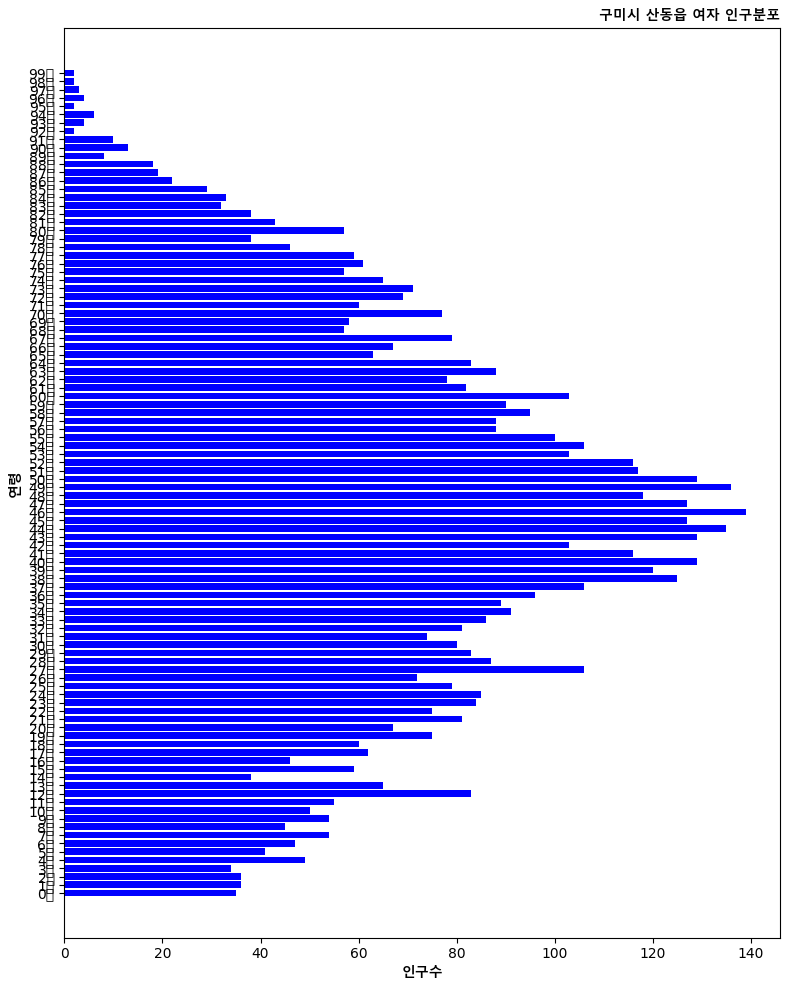

In [35]:
df.columns = df.columns.str.strip()

# ▶ 행정구역 필터링
target_df = df[df['행정구역'] == '서울특별시 종로구 청운효자동(1111051500)']

# ▶ 연령별 여자 인구 컬럼 추출
age_columns = [col for col in df.columns if col.startswith('2020년01월_여_') and col.endswith('세')]
ages = [col.split('_')[-1] for col in age_columns]
population = target_df[age_columns].values.flatten().astype(int)

# ▶ 수평 막대그래프 (우측 정렬, blue)
plt.figure(figsize=(8, 10))
plt.barh(ages, population, color='blue')
plt.title('구미시 산동읍 여자 인구분포', loc='right', fontproperties=font_prop)
plt.xlabel('인구수', fontproperties=font_prop)
plt.ylabel('연령', fontproperties=font_prop)
plt.tight_layout()
plt.show()

/tmp/ipython-input-38-829707896.py:36: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-38-829707896.py:36: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-38-829707896.py:36: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-38-829707896.py:36: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11

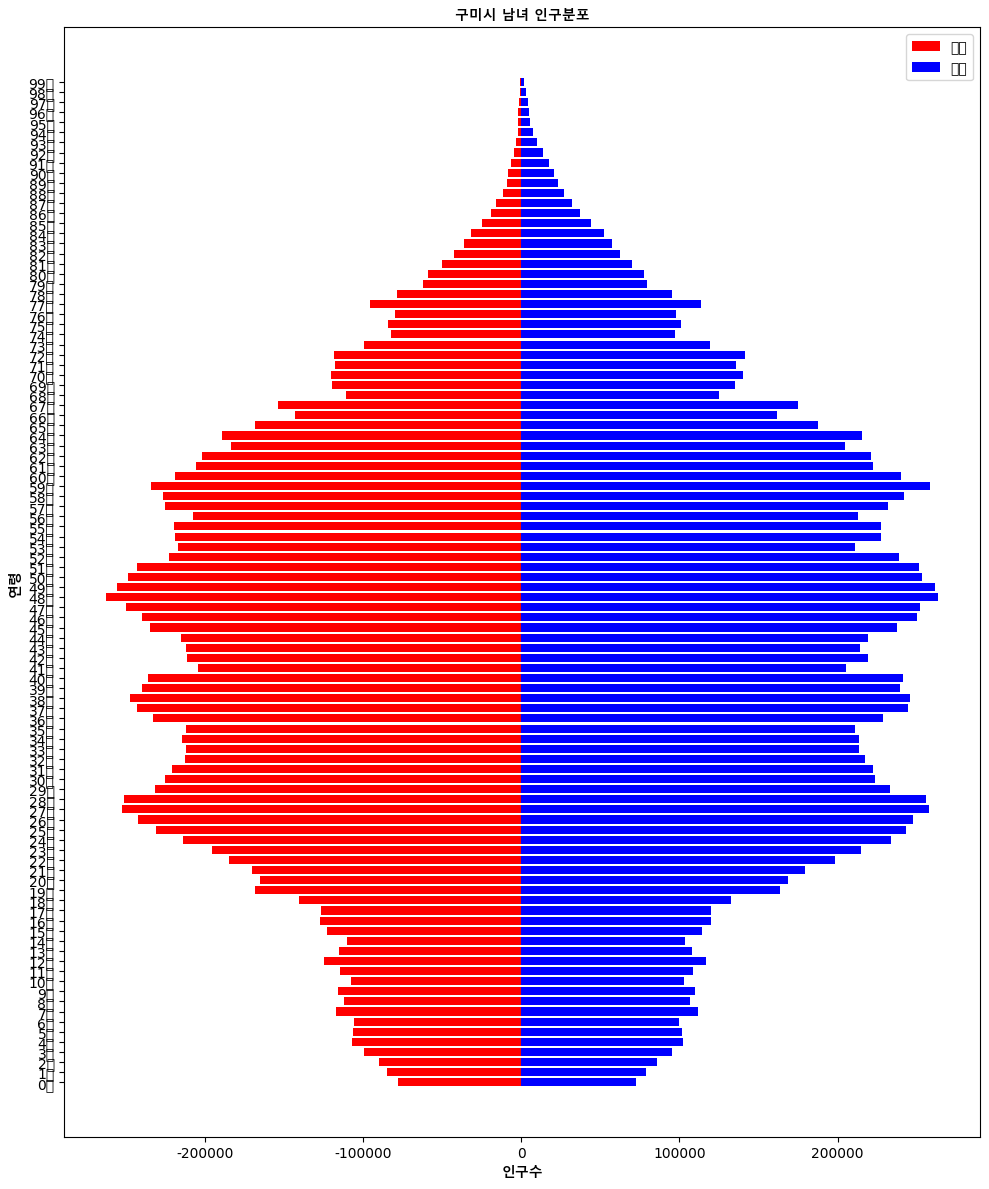

In [38]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

# ▶ 폰트 설정
font_path = '/content/malgunbd.ttf'  # Colab 사용 시 업로드 필요
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # - 부호 깨짐 방지

# ▶ 공백 제거
df.columns = df.columns.str.strip()

# ▶ '구미시'가 포함된 행 찾기
target_df = df[df['행정구역'].str.contains('서울특별시')]

# ▶ 연령별 남녀 인구 컬럼
male_columns = [col for col in df.columns if col.startswith('2020년01월_남_') and col.endswith('세')]
female_columns = [col for col in df.columns if col.startswith('2020년01월_여_') and col.endswith('세')]
ages = [col.split('_')[-1] for col in male_columns]  # 동일한 연령대 사용

# ▶ 인구 데이터 (남자는 음수로 변환)
# ▶ 인구 데이터 (남자는 음수로 변환, 쉼표 제거 후 정수형 변환)
male_population = -target_df[male_columns].replace(',', '', regex=True).astype(str).astype(int).sum().values
female_population = target_df[female_columns].replace(',', '', regex=True).astype(str).astype(int).sum().values


# ▶ 항아리형 그래프 그리기
plt.figure(figsize=(10, 12))
plt.barh(ages, male_population, color='red', label='남자')
plt.barh(ages, female_population, color='blue', label='여자')
plt.title('구미시 남녀 인구분포', fontproperties=font_prop)
plt.xlabel('인구수', fontproperties=font_prop)
plt.ylabel('연령', fontproperties=font_prop)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


/tmp/ipython-input-39-3288574872.py:34: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-39-3288574872.py:34: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-39-3288574872.py:34: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-39-3288574872.py:34: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python

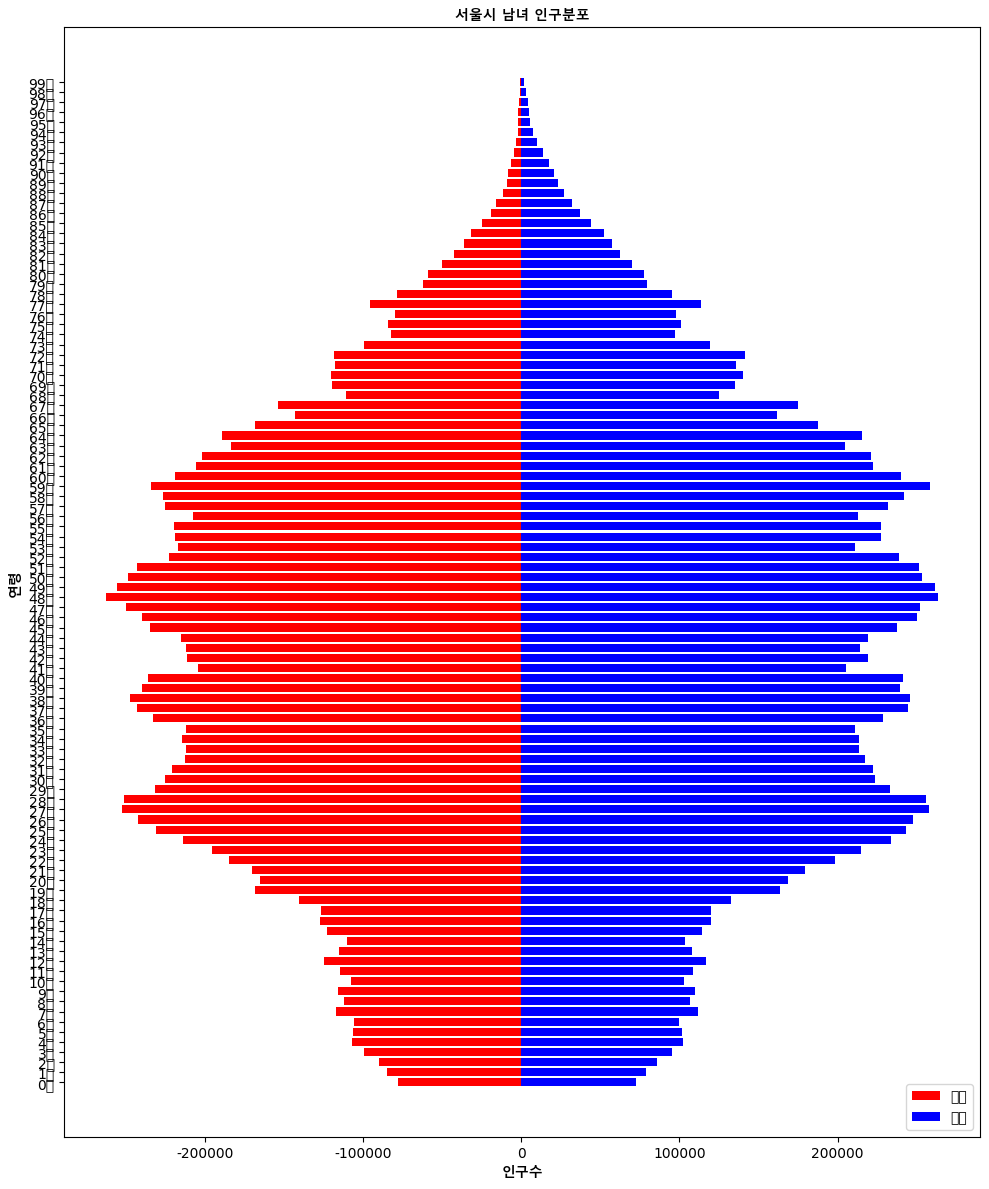

In [39]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

# ▶ 한글 폰트 설정
font_path = '/content/malgunbd.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # - 부호 깨짐 방지

# ▶ 공백 제거
df.columns = df.columns.str.strip()

# ▶ 서울특별시 포함 행 필터링
target_df = df[df['행정구역'].str.contains('서울특별시')]

# ▶ 남녀 연령별 컬럼 추출
male_columns = [col for col in df.columns if col.startswith('2020년01월_남_') and col.endswith('세')]
female_columns = [col for col in df.columns if col.startswith('2020년01월_여_') and col.endswith('세')]
ages = [col.split('_')[-1] for col in male_columns]

# ▶ 쉼표 제거 후 숫자형 변환 → 남자: 음수 처리
male_population = -target_df[male_columns].replace(',', '', regex=True).astype(str).astype(int).sum().values
female_population = target_df[female_columns].replace(',', '', regex=True).astype(str).astype(int).sum().values

# ▶ 항아리형 그래프 출력
plt.figure(figsize=(10, 12))
plt.barh(ages, male_population, color='red', label='남자')
plt.barh(ages, female_population, color='blue', label='여자')
plt.title('서울시 남녀 인구분포', fontproperties=font_prop)
plt.xlabel('인구수', fontproperties=font_prop)
plt.ylabel('연령', fontproperties=font_prop)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
